In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [17]:
data = pd.read_csv("data/ToySGDPlot/ToySGD/exponential_decay/0/Rastrigin/aggregated_run_data.csv")

In [18]:
last_steps = data[data["batch"] == 100]
best_run_id = last_steps.loc[last_steps["f_cur"].idxmax()]["run"]
worst_run_id = last_steps.loc[last_steps["f_cur"].idxmin()]["run"]

min_data = data[data["run"] == best_run_id]
max_data = data[data["run"] == worst_run_id]

plt.rcParams.update({
    "text.usetex": True,
})

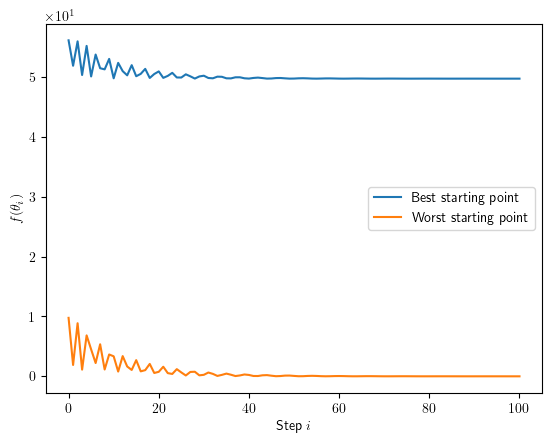

In [20]:
ax = sns.lineplot(min_data,
                    x="batch",
                    y="f_cur",
                    label="Best starting point")
ax = sns.lineplot(max_data,
                          x="batch",
                          y="f_cur",
                          label="Worst starting point")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
ax.set_xlabel("Step $i$")
ax.set_ylabel("$f(\\theta_i)$")
plt.legend(loc = "center right")
plt.savefig(Path("starting_points.pdf"), bbox_inches="tight")